# TIPE 2023-2024 "Jeux et sports" 
### MORAIN Arthur MP2 Montaigne

## <ins>Optimisation de l'arrêt au stand en Formule 1</ins> 

### **<ins>IV- Une nouvelle exploration de données :</ins>**   

#### <ins>a- Création du chemin et ouverture des modules : </ins>

In [9]:
path = '/Users/morainarthur/Home/Datascience/redbull-pit-strategy/notebooks'
data_path = '/Users/morainarthur/Home/Datascience/redbull-pit-strategy/data/'
cwd = os.getcwd()
print("Current working directory is:", cwd)

Current working directory is: /Users/morainarthur/Home/Datascience/redbull-pit-strategy/notebooks


In [7]:
import os
os.chdir(path)
import pandas as pd
import logging
import json
import pickle
import requests
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

#### <ins>b- Les données météorologiques : </ins>

-> Il faut remarquer que les données météorologiques ne sont pas avec les données des tours, en effet ces données sont associées à des sessions et pas à des tours

In [10]:
file = open('{}{}'.format(data_path, 'weathers_data.pickle'),'rb')
df_weather = pickle.load(file)

-> On se retrouve de nouveau avec des types plus faciles à maitriser

In [11]:
df_weather.shape

(51149, 13)

In [12]:
df_weather.columns

Index(['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'RoundNumber', 'EventName', 'country',
       'session', 'EventDate'],
      dtype='object')

In [13]:
df_weather.head(4)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,RoundNumber,EventName,country,session,EventDate
0,0 days 00:00:24.964000,25.3,36.7,1020.2,False,38.5,330,2.6,1,Australian Grand Prix,Australia,FP1,2018-03-23 12:00:00+11:00
1,0 days 00:01:24.977000,25.4,36.9,1020.0,False,38.5,308,2.5,1,Australian Grand Prix,Australia,FP1,2018-03-23 12:00:00+11:00
2,0 days 00:02:24.990000,25.2,36.8,1020.1,False,38.5,305,2.7,1,Australian Grand Prix,Australia,FP1,2018-03-23 12:00:00+11:00
3,0 days 00:03:25.002000,25.3,36.1,1020.1,False,38.5,305,2.5,1,Australian Grand Prix,Australia,FP1,2018-03-23 12:00:00+11:00


-> Les informations pourront donc être utilisé ce qui nous donne 7 variables de travail supplémentaire

-> En plus de travailler selon le circuit on pourra travailler selon la météo (ce qui est un caractère important)

In [15]:
df_weather['session'].count

<bound method Series.count of 0       FP1
1       FP1
2       FP1
3       FP1
4       FP1
       ... 
130    Race
131    Race
132    Race
133    Race
134    Race
Name: session, Length: 51149, dtype: object>

In [16]:
df_weather[df_weather['session']=='Race'].head(3)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,RoundNumber,EventName,country,session,EventDate
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,Australian Grand Prix,Australia,Race,2018-03-25 16:10:00+11:00
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,Australian Grand Prix,Australia,Race,2018-03-25 16:10:00+11:00
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,Australian Grand Prix,Australia,Race,2018-03-25 16:10:00+11:00


In [19]:
ave_weather = df_weather[df_weather['session']=='Race'].groupby(['EventName','session','EventDate']).mean().reset_index().sort_values(['EventName'])
ave_weather.head(5)

,EventName,session,EventDate,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,RoundNumber
0,70th Anniversary Grand Prix,Race,2020-08-09 14:10:00+01:00,25.287069,58.556034,1000.950862,0.000000,43.227586,71.931034,2.236207,5.0
1,Abu Dhabi Grand Prix,Race,2018-11-25 17:10:00+04:00,31.273723,45.437956,1013.111679,0.043796,33.318248,241.175182,2.163504,21.0
2,Abu Dhabi Grand Prix,Race,2019-12-01 17:10:00+04:00,26.018045,64.471429,1015.383459,0.000000,29.566165,221.097744,1.264662,21.0
3,Abu Dhabi Grand Prix,Race,2020-12-13 17:10:00+04:00,23.121481,55.446667,1015.847407,0.000000,27.980000,258.244444,2.504444,17.0
4,Abu Dhabi Grand Prix,Race,2021-12-12 17:00:00+04:00,24.519108,59.054777,1017.710828,0.000000,28.465605,289.191083,0.414650,22.0


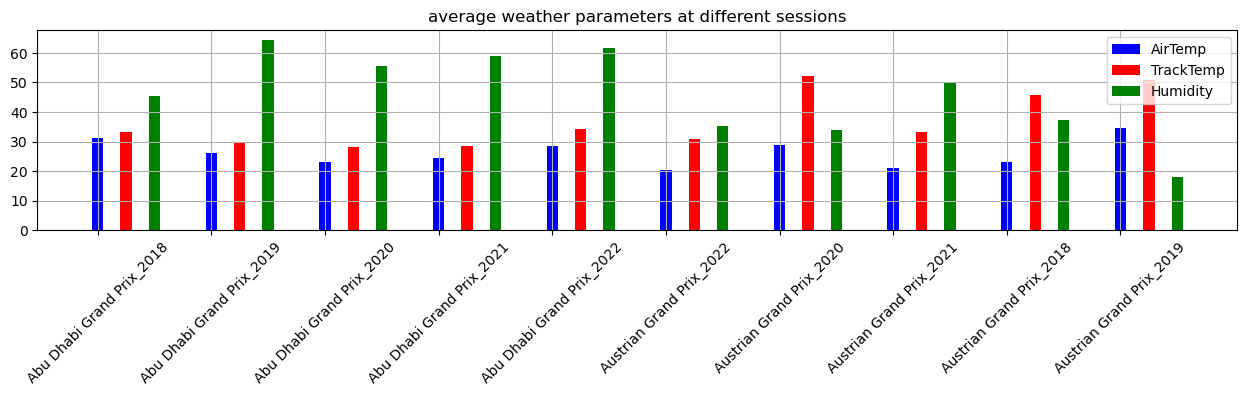

In [20]:
def plot_weather(d_f):

    fig = plt.figure(figsize=(12,2))
    ax = fig.add_axes([0,0,1,1])
    labels = [d_f.loc[x,['EventName']].values[0] +'_'+ 
              str(pd.DatetimeIndex(d_f.loc[x,['EventDate']]).year.values[0]) 
              for x in range(len(d_f))]
    x = np.arange(len(labels) )
    ax.bar(x + 0.00, d_f['AirTemp'], color='b', width=0.10)
    ax.bar(x + 0.25, d_f['TrackTemp'], color='r', width=0.10)
    ax.bar(x + 0.50, d_f['Humidity'], color='g', width=0.10)
    ax.set_xticks(x, labels, rotation=45, fontsize =10)
    ax.legend(['AirTemp','TrackTemp','Humidity'])
    ax.grid()
    plt.title('average weather parameters at different sessions')
    plt.show()
    return


plot_weather(ave_weather[(ave_weather['EventName']=='Austrian Grand Prix') | 
    (ave_weather['EventName']=='Abu Dhabi Grand Prix')].reset_index())

-> les données météréologiques ne sont pas les mêmes chaque année sur les circuits ce qui nous fait remarquer que la donnée météo est intéressante

In [38]:
df_weather['EventName'].count

<bound method Series.count of 0      Australian Grand Prix
1      Australian Grand Prix
2      Australian Grand Prix
3      Australian Grand Prix
4      Australian Grand Prix
               ...          
130     Abu Dhabi Grand Prix
131     Abu Dhabi Grand Prix
132     Abu Dhabi Grand Prix
133     Abu Dhabi Grand Prix
134     Abu Dhabi Grand Prix
Name: EventName, Length: 51149, dtype: object>

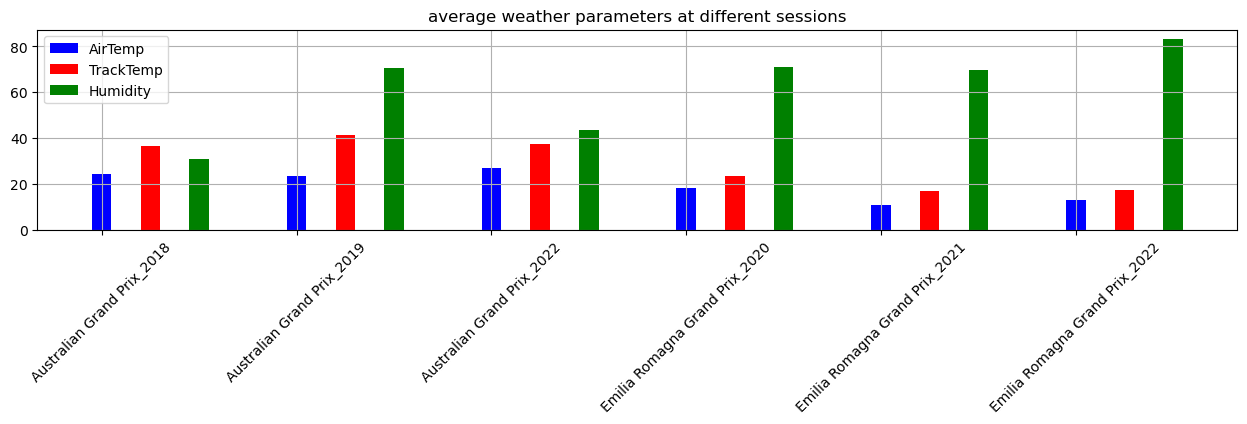

In [31]:
plot_weather(ave_weather[(ave_weather['EventName']=='Emilia Romagna Grand Prix') | 
    (ave_weather['EventName']=='Australian Grand Prix')].reset_index())

-> la saison se déroulant sur 7 mois, la météo n'est pas la même partout

In [26]:
def plot_pressure(d_f):

    fig = plt.figure(figsize=(12,2))
    ax = fig.add_axes([0,0,1,1])
    labels = [d_f.loc[x,['EventName']].values[0] +'_'+ 
              str(pd.DatetimeIndex(d_f.loc[x,['EventDate']]).year.values[0]) 
              for x in range(len(d_f))]
    x = np.arange(len(labels) )
    ax.bar(x + 0.00, d_f['Pressure'], color='b', width=0.10)
    ax.set_xticks(x, labels, rotation=45, fontsize =10)
    ax.legend(['Pressure'])
    ax.grid()
    plt.title('average pressure parameters at different sessions')
    plt.show()
    return

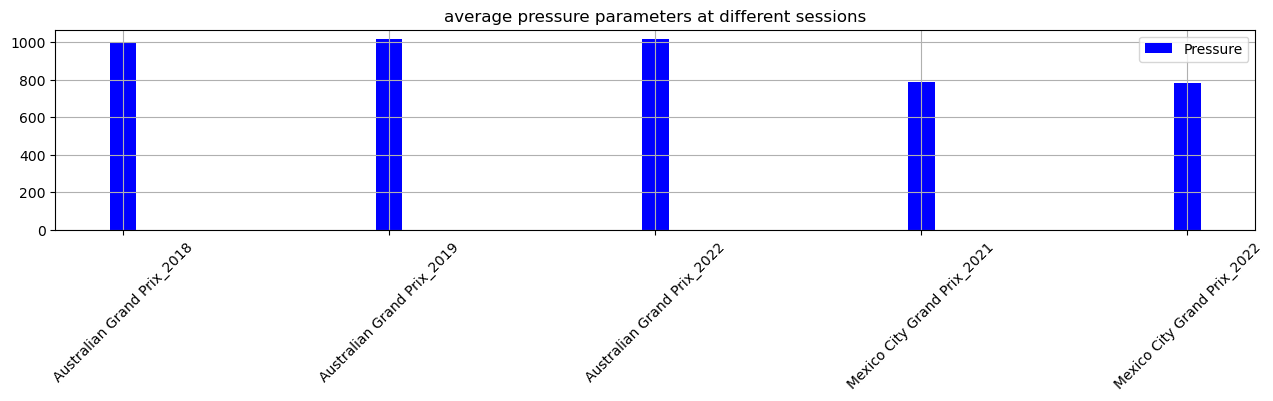

In [42]:
plot_pressure(ave_weather[(ave_weather['EventName']=='Australian Grand Prix') | 
    (ave_weather['EventName']=='Mexico City Grand Prix')].reset_index())

-> La pression est caractéristique de la position du circuit mais cependant elle ne varie pas en fonction des année ainsi on peut retirer ce paramètre si l'algorithme dépend du circuit

#### <ins>c- Les résultats de course : </ins>

In [43]:
file = open('{}{}'.format(data_path, 'results_data.pickle'),'rb')
df_res = pickle.load(file)

-> ces données vraisemblablement pourraient être intéressante mais ne vont pas nous servir

In [44]:
df_res['eventYear'] = pd.to_datetime(df_res['EventDate'], utc=True).dt.year
df_res['Q1Sec'] = df_res['Q1']/np.timedelta64(1, 's')
df_res['Q2Sec'] = df_res['Q2']/np.timedelta64(1, 's')
df_res['Q3Sec'] = df_res['Q3']/np.timedelta64(1, 's')
df_res['TimeSec'] = df_res['Time']/np.timedelta64(1, 's')

In [45]:
df_res.head(5)

,index,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,...,RoundNumber,EventName,country,session,EventDate,eventYear,Q1Sec,Q2Sec,Q3Sec,TimeSec
0,3,3,D RICCIARDO,RIC,,Renault,fff500,,Daniel,Ricciardo,...,1,Australian Grand Prix,Australia,FP1,2019-03-15 12:00:00+11:00,2019,NaN,NaN,NaN,NaN
1,4,4,L NORRIS,NOR,,McLaren,ff8700,,Lando,Norris,...,1,Australian Grand Prix,Australia,FP1,2019-03-15 12:00:00+11:00,2019,NaN,NaN,NaN,NaN
2,5,5,S VETTEL,VET,,Ferrari,dc0000,,Sebastian,Vettel,...,1,Australian Grand Prix,Australia,FP1,2019-03-15 12:00:00+11:00,2019,NaN,NaN,NaN,NaN
3,7,7,K RAIKKONEN,RAI,,Alfa Romeo Racing,9b0000,,Kimi,Räikkönen,...,1,Australian Grand Prix,Australia,FP1,2019-03-15 12:00:00+11:00,2019,NaN,NaN,NaN,NaN
4,8,8,R GROSJEAN,GRO,,Haas F1 Team,bd9e57,,Romain,Grosjean,...,1,Australian Grand Prix,Australia,FP1,2019-03-15 12:00:00+11:00,2019,NaN,NaN,NaN,NaN


#### <ins>d- Les données de tour : </ins>

Enfin 

In [46]:
file = open('{}{}'.format(data_path, 'laps_data.pickle'),'rb')
df_laps = pickle.load(file)
# Columns to drop
drop_cols = ['Sector1Time','Sector2Time','Sector3Time',
             'Sector1SessionTime','Sector2SessionTime','Sector3SessionTime',
            'SpeedI1','SpeedI2','SpeedFL', 'IsAccurate']

df_laps['eventYear'] = pd.to_datetime(df_laps['EventDate'], utc=True).dt.year
df_laps['lapTimeSec'] = df_laps['LapTime']/np.timedelta64(1, 's')


In [47]:
df_laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'RoundNumber', 'EventName', 'country',
       'session', 'EventDate', 'eventYear', 'lapTimeSec'],
      dtype='object')

In [48]:
df_laps.head(6)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,DeletedReason,FastF1Generated,IsAccurate,RoundNumber,EventName,country,session,EventDate,eventYear,lapTimeSec
0,0 days 00:20:19.908000,VER,1,NaT,1.0,1.0,0 days 00:18:33.392000,NaT,NaT,0 days 00:00:46.433000,...,,False,False,1,Bahrain Grand Prix,Bahrain,FP1,2022-03-18 15:00:00+03:00,2022,NaN
1,0 days 00:21:57.674000,VER,1,0 days 00:01:37.766000,2.0,1.0,NaT,NaT,0 days 00:00:30.695000,0 days 00:00:41.580000,...,,False,True,1,Bahrain Grand Prix,Bahrain,FP1,2022-03-18 15:00:00+03:00,2022,97.766
2,0 days 00:36:10.140000,VER,1,NaT,3.0,1.0,NaT,0 days 00:24:20.357000,0 days 00:00:47.032000,NaT,...,,False,False,1,Bahrain Grand Prix,Bahrain,FP1,2022-03-18 15:00:00+03:00,2022,NaN
3,0 days 00:38:04.834000,VER,1,NaT,4.0,2.0,0 days 00:36:10.140000,NaT,NaT,0 days 00:00:45.882000,...,,False,False,1,Bahrain Grand Prix,Bahrain,FP1,2022-03-18 15:00:00+03:00,2022,NaN
4,0 days 00:39:39.617000,VER,1,0 days 00:01:34.783000,5.0,2.0,NaT,NaT,0 days 00:00:30.119000,0 days 00:00:40.789000,...,,False,True,1,Bahrain Grand Prix,Bahrain,FP1,2022-03-18 15:00:00+03:00,2022,94.783
5,0 days 00:41:48.377000,VER,1,0 days 00:02:08.760000,6.0,2.0,NaT,NaT,0 days 00:00:42.765000,0 days 00:01:00.164000,...,,False,True,1,Bahrain Grand Prix,Bahrain,FP1,2022-03-18 15:00:00+03:00,2022,128.760


Restons en là, le plaisir des graphiques semble s'approcher